In [1]:
#Importamos Librerias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta


Extracción y carga  del Dataframe de Yahoo Finance (yf).
Extracion y carga del Dataframe Wikipedia

In [3]:
# Definimos la fecha de inicio de los ultimo 23 años 
start_date = datetime.now() - timedelta(days=23*365)
# Descargar los datos históricos del S&P500
SP500_df = yf.download("^GSPC", start=start_date)

[*********************100%***********************]  1 of 1 completed


In [6]:
SP500_df.to_csv('./sp_500.csv')

In [13]:
SP500_df = pd.read_csv('./sp_500.csv',index_col=0, parse_dates=True)

In [21]:
#Observamos las principales variable del datasets
SP500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-06,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000
2000-03-07,1391.280029,1399.209961,1349.989990,1355.619995,1355.619995,1314100000
2000-03-08,1355.619995,1373.790039,1346.619995,1366.699951,1366.699951,1203000000
2000-03-09,1366.699951,1401.819946,1357.880005,1401.689941,1401.689941,1123000000
2000-03-10,1401.689941,1413.459961,1392.069946,1395.069946,1395.069946,1138800000


<Axes: xlabel='Date'>

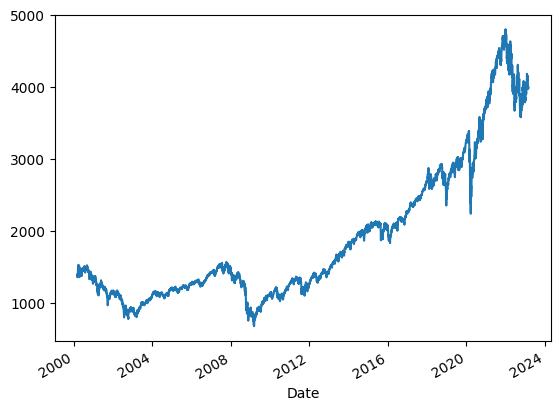

In [49]:
SP500_df['Close'].plot()


Text(0.5, 1.0, 'Crecimiento histórico del S&P500 en los ultimos 23 años')

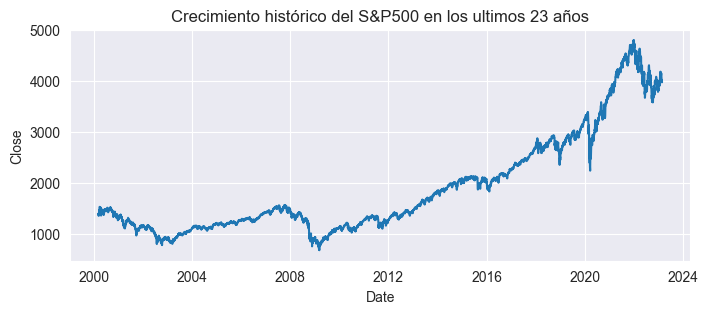

In [15]:
fig = plt.figure(figsize=(8,3))
sns.lineplot(x="Date", y='Close', data=SP500_df)
sns.set_style("darkgrid")
plt.title('Crecimiento histórico del S&P500 en los ultimos 23 años')


Hacemos los histogramas del S&P500 del cierre a la baja y a la alta y vemos la distribucion en dias como
ha sido su comportamiento.

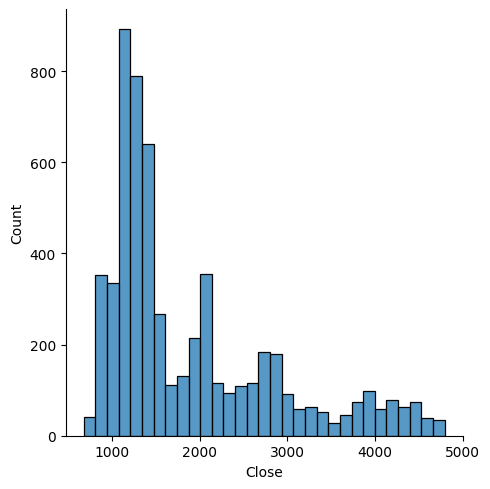

In [50]:
#Hacemos un grafico para ver la distribucion de la variable de cierre.
sns.displot( x= "Close",data=SP500_df) 

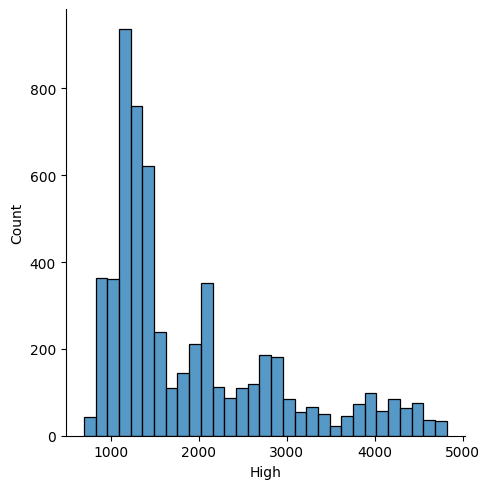

In [6]:
#Hacemos un grafico para ver la distribucion de la variable de donde en el indice estuvo mas alto.
sns.displot( x= "High",data=SP500_df) 

<Axes: xlabel='Low', ylabel='Count'>

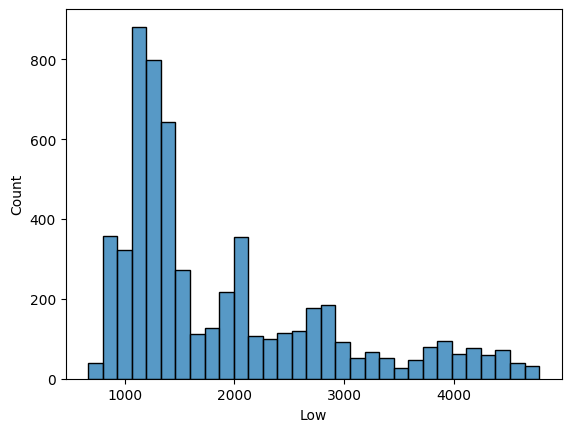

In [23]:
#Hacemos un grafico para ver la distribucion de la variable de cierre.
sns.histplot( x= "Low",data=SP500_df) 

In [52]:
#Analizamos los valores del SP&500 en los ultimos 23 años 
#viendo su promedio,  desviacion standard, media y otras variables estadisticas descriptivas.
SP500_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5.782000e+03
mean,1890.694237,1901.981901,1878.477065,1890.926020,1890.926020,3.319084e+09
std,980.059778,985.208758,974.431778,980.179592,980.179592,1.516176e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1183.757507,1190.560028,1175.489960,1183.535034,1183.535034,2.048872e+09
50%,1436.885010,1446.885010,1428.969971,1437.635010,1437.635010,3.420585e+09
75%,2401.197449,2414.030029,2391.674927,2400.409912,2400.409912,4.165180e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [17]:
#Añadimos otro dataset complentario para poder hacer un analisis del S&P500 por sectores y con otras variables.

sp_500II = pd.read_csv('C:/Users/berna/OneDrive/Desktop/Analitics_PI03/constituents-financials.csv')

In [18]:
sp_500II.head(3)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [10]:
#observamos el tipo de variables que  tien nuestro Dataset. obesrvamos que tenemos variable categoricas y numericas
sp_500II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    int64  
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 55.4+ KB


In [11]:
#observamos la cantidad de datos nulos que tiene el Dataframe y vemos que escasa.
sp_500II.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

##**Hacemos un analisis por Sector del S&P5003**

Text(0.5, 1.0, 'Crecimiento y tamaño de los sectores del S&P500')

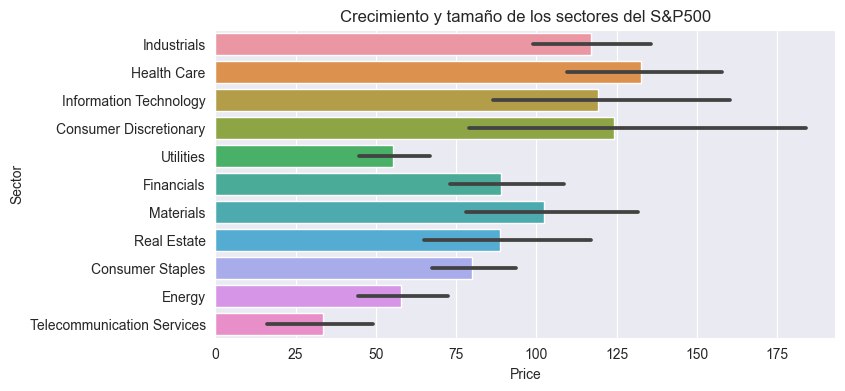

In [19]:
# hacemos el grafico del Sector que mas ha crecido del S&P500
fig = plt.figure(figsize=(8,4))
sns.barplot(x="Price", y='Sector', data=sp_500II)
sns.set_style("darkgrid")
plt.title('Crecimiento y tamaño de los sectores del S&P500')

##Observamos que los sectores de mayor creciemiento como el Industrial, Salud y Tecnologia.

Ahora vamos a analizar el datasets de las 500 empresas del S&P500 para filtrar las empresas a ecoger por sectores:
Tecnologico, Salud e Industrial

In [3]:
df_companies =pd.read_csv('dataspx500.csv')

In [9]:
#Cargamos el dataset
df_companies.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,ADM,ADM,Consumer Staples,Agricultural Products,"Chicago, Illinois",1957-03-04,7084,1902
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
8,ADP,ADP,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949
9,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932


In [8]:
#Observamos las variables y el tipo de datos
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             499 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [23]:


#Analizamos el cierre de varias empresas del sector tecnologia en los ultimos 23 años
# Crear una lista con los símbolos de las empresas
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL','NFLX','NVDA']
# Obtener los datos de las empresas
companies = yf.download(symbols, start='2000-01-01', end='2023-02-28', interval='1d')
# Seleccionar la columna 'Close' de cada empresa
close_prices_tec = companies['Close']
# Imprimir los precios de cierre
print(close_prices_tec)

[*********************100%***********************]  6 of 6 completed
                  AAPL       AMZN      GOOGL        MSFT        NFLX  \
Date                                                                   
2000-01-03    0.999442   4.468750        NaN   58.281250         NaN   
2000-01-04    0.915179   4.096875        NaN   56.312500         NaN   
2000-01-05    0.928571   3.487500        NaN   56.906250         NaN   
2000-01-06    0.848214   3.278125        NaN   55.000000         NaN   
2000-01-07    0.888393   3.478125        NaN   55.718750         NaN   
...                ...        ...        ...         ...         ...   
2023-02-21  148.479996  94.580002  91.790001  252.669998  337.500000   
2023-02-22  148.910004  95.790001  91.650002  251.509995  334.880005   
2023-02-23  149.399994  95.820000  90.889999  254.770004  323.649994   
2023-02-24  146.710007  93.500000  89.129997  249.220001  317.149994   
2023-02-27  147.919998  93.760002  89.870003  250.160004  323.02999

In [24]:
close_prices_tec.to_csv(('./tecnologia.csv'))

In [29]:
close_prices_tec = pd.read_csv('tecnologia.csv',index_col=0, parse_dates=True)

In [30]:
#observamos  nuestro nuevo datasets y observamos variables
close_prices_tec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5825 entries, 2000-01-03 to 2023-02-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5825 non-null   float64
 1   AMZN    5825 non-null   float64
 2   GOOGL   4663 non-null   float64
 3   MSFT    5825 non-null   float64
 4   NFLX    5227 non-null   float64
 5   NVDA    5825 non-null   float64
dtypes: float64(6)
memory usage: 318.6 KB


In [32]:
close_prices_tec.head()

,AAPL,AMZN,GOOGL,MSFT,NFLX,NVDA
Date,,,,,,
2000-01-03,0.999442,4.468750,NaN,58.28125,NaN,0.975260
2000-01-04,0.915179,4.096875,NaN,56.31250,NaN,0.949219
2000-01-05,0.928571,3.487500,NaN,56.90625,NaN,0.917969
2000-01-06,0.848214,3.278125,NaN,55.00000,NaN,0.858073
2000-01-07,0.888393,3.478125,NaN,55.71875,NaN,0.872396


In [33]:
# Vemos cuantos Nulos se encuentran en cada columna
close_prices_tec.isnull().sum()

AAPL        0
AMZN        0
GOOGL    1162
MSFT        0
NFLX      598
NVDA        0
dtype: int64

Text(0.5, 1.0, 'Comparación de las empresas de Tecnología del S&P500 más grandes')

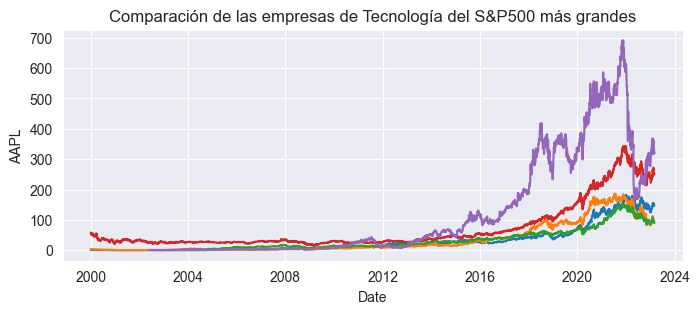

In [28]:
fig = plt.figure(figsize=(8,3))
sns.lineplot(x='Date', y='AAPL', data=close_prices_tec)
sns.lineplot(x='Date', y='AMZN', data=close_prices_tec)
sns.lineplot(x='Date', y='GOOGL', data=close_prices_tec)
sns.lineplot(x='Date', y='MSFT', data=close_prices_tec)
sns.lineplot(x='Date', y='NFLX', data=close_prices_tec)
sns.set_style("darkgrid")
plt.title('Comparación de las empresas de Tecnología del S&P500 más grandes')


En este Gráfico analizamos los precios de Cierre de las cuatro empresas mas grandes de Tecnología  que conforman el S&P500

In [12]:
#Analizamos el cierre de varias empresas del sector Salud en los ultimos 23 años
# Crear una lista con los símbolos de las empresas
symbols = ['UHN', 'LLY', 'JNJ', 'ABBV','NVO','MRK']
# Obtener los datos de las empresas
companies = yf.download(symbols, start='2000-01-01', end='2023-02-28', interval='1d')
# Seleccionar la columna 'Close' de cada empresa
close_prices_HEALTH = companies['Close']
# Imprimir los precios de cierre
print(close_prices_HEALTH)

[*********************100%***********************]  6 of 6 completed
                  ABBV         JNJ         LLY         MRK         NVO  UHN
Date                                                                       
2000-01-03         NaN   46.093750   65.562500   64.527672    2.690000  NaN
2000-01-04         NaN   44.406250   63.500000   62.261452    2.677500  NaN
2000-01-05         NaN   44.875000   64.312500   64.706581    2.627500  NaN
2000-01-06         NaN   46.281250   66.187500   65.243324    2.670000  NaN
2000-01-07         NaN   48.250000   71.062500   71.505249    2.740000  NaN
...                ...         ...         ...         ...         ...  ...
2023-02-21  152.000000  158.000000  327.510010  109.070000  142.610001  NaN
2023-02-22  150.669998  157.779999  329.070007  109.160004  142.250000  NaN
2023-02-23  152.070007  157.729996  327.519989  110.589996  142.889999  NaN
2023-02-24  152.710007  155.970001  321.640015  109.889999  141.600006  NaN
2023-02-27  154.279

In [13]:
close_prices_HEALTH.to_csv('health.csv')

In [4]:
close_prices_HEALTH = pd.read_csv('health.csv',index_col=0, parse_dates=True)

In [15]:
close_prices_HEALTH.head()

,Date,ABBV,JNJ,LLY,MRK,NVO,UHN
0,2000-01-03,NaN,46.09375,65.5625,64.527672,2.6900,NaN
1,2000-01-04,NaN,44.40625,63.5000,62.261452,2.6775,NaN
2,2000-01-05,NaN,44.87500,64.3125,64.706581,2.6275,NaN
3,2000-01-06,NaN,46.28125,66.1875,65.243324,2.6700,NaN
4,2000-01-07,NaN,48.25000,71.0625,71.505249,2.7400,NaN


In [34]:
close_prices_HEALTH.isnull().sum()

Date       0
ABBV    3269
JNJ        0
LLY        0
MRK        0
NVO        0
UHN     3200
dtype: int64

Text(0.5, 1.0, 'Comparación de las empresas de la salud del S&P500 más grandes')

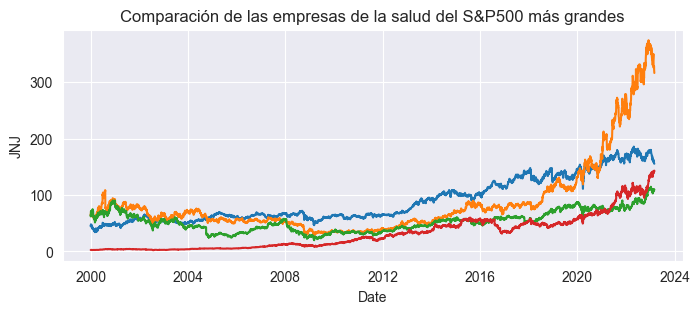

In [5]:
fig = plt.figure(figsize=(8,3))
sns.lineplot(x='Date', y='JNJ', data=close_prices_HEALTH)
sns.lineplot(x='Date', y='LLY', data=close_prices_HEALTH)
sns.lineplot(x='Date', y='MRK', data=close_prices_HEALTH)
sns.lineplot(x='Date', y='NVO', data=close_prices_HEALTH)
sns.set_style("darkgrid")
plt.title('Comparación de las empresas de la salud del S&P500 más grandes')

In [19]:
close_prices_HEALTH.describe()

,ABBV,JNJ,LLY,MRK,NVO,UHN
count,2556.000000,5825.000000,5825.000000,5825.000000,5825.000000,2625.000000
mean,83.520078,89.673173,86.755604,53.170477,32.056512,26.830910
std,31.570403,39.527031,66.916331,18.348810,30.199388,9.791369
min,33.709999,34.250000,27.469999,20.028625,2.231000,9.720000
25%,59.887500,59.759998,52.090000,36.965649,5.563000,19.010000
50%,76.494999,66.720001,65.000000,52.051525,23.628000,26.680000
75%,100.027502,123.900002,84.470001,65.183685,49.130001,33.070000
max,174.960007,186.009995,374.760010,114.839996,143.360001,66.080002


Obtenemos el valor del precio de las Acciones del Ultimo año de las empresas del sector Salud que mas cotizan en bolsas
y por sus tamaños y crecimiento fueron escogidas.

In [7]:
#Analizamos el cierre de varias empresas del sector Salud en los ultimos 23 años
# Crear una lista con los símbolos de las empresas
symbols = ['UHN', 'LLY', 'JNJ', 'ABBV','NVO','MRK']
# Obtener los datos de las empresas
companies = yf.download(symbols, start='2022-02-01', end='2023-02-28', interval='1d')
# Seleccionar la columna 'Close' de cada empresa
last_prices_HEALTH = companies['Close']
# Imprimir los precios de cierre
print(last_prices_HEALTH)

[*********************100%***********************]  6 of 6 completed

1 Failed download:
- UHN: No data found for this date range, symbol may be delisted
                  ABBV         JNJ         LLY         MRK         NVO  UHN
Date                                                                       
2022-02-01  137.000000  170.880005  248.279999   81.919998  102.599998  NaN
2022-02-02  138.619995  172.770004  250.830002   82.010002  106.589996  NaN
2022-02-03  140.729996  172.759995  244.809998   79.010002  104.629997  NaN
2022-02-04  140.649994  171.630005  242.270004   78.559998   99.669998  NaN
2022-02-07  142.529999  171.059998  243.550003   77.580002  101.760002  NaN
...                ...         ...         ...         ...         ...  ...
2023-02-21  152.000000  158.000000  327.510010  109.070000  142.610001  NaN
2023-02-22  150.669998  157.779999  329.070007  109.160004  142.250000  NaN
2023-02-23  152.070007  157.729996  327.519989  110.589996  142.889999  NaN
2023-02-24

In [10]:
#Guardamos nuestro datasets
last_prices_HEALTH.to_csv('last_health.csv')

In [11]:
last_prices_HEALTH = pd.read_csv('last_health.csv')

Obtenemos el promedio, la desviacion standard y los percentiles  las acciones del sector salud del ultimo año.

In [12]:
last_prices_HEALTH.describe()

,ABBV,JNJ,LLY,MRK,NVO,UHN
count,269.000000,269.000000,269.000000,269.000000,269.000000,0.0
mean,150.126543,171.940260,316.909332,93.192268,114.447658,NaN
std,8.249021,6.481462,34.463290,10.812175,12.751420,NaN
min,134.210007,155.630005,234.690002,73.510002,95.279999,NaN
25%,143.199997,166.190002,295.190002,86.279999,105.059998,NaN
50%,149.539993,172.759995,317.700012,90.529999,110.199997,NaN
75%,154.990005,177.229996,344.149994,102.309998,118.199997,NaN
max,174.960007,186.009995,374.760010,114.839996,143.360001,NaN


In [19]:
# Definimos la fecha de inicio de los ultimo 23 años
start_date = datetime.now() - timedelta(days=23*365)
# Descargar los datos históricos de Microsoft
msft_df = yf.download("MSFT", start=start_date)


[*********************100%***********************]  1 of 1 completed


In [17]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5782 entries, 2000-03-03 to 2023-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5782 non-null   float64
 1   High       5782 non-null   float64
 2   Low        5782 non-null   float64
 3   Close      5782 non-null   float64
 4   Adj Close  5782 non-null   float64
 5   Volume     5782 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 316.2 KB


In [20]:
msft_df.to_csv('./msft.csv')

In [7]:
msft_df=pd.read_csv('./msft.csv',index_col=0, parse_dates=True)

In [23]:
msft_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-03,47.37500,49.43750,46.93750,48.06250,29.986105,101435200
2000-03-06,48.00000,48.68750,45.06250,45.31250,28.270393,93609400
2000-03-07,48.06250,48.75000,45.96875,46.43750,28.972273,135061000
2000-03-08,46.90625,48.09375,45.50000,47.78125,29.810644,94290000
2000-03-09,47.65625,50.00000,47.50000,50.00000,31.194925,88198800


In [24]:
msft_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5.782000e+03
mean,70.123797,70.861023,69.368839,70.138221,63.443290,5.201020e+07
std,76.764175,77.565120,75.904360,76.778977,78.282017,3.091931e+07
min,15.200000,15.620000,14.870000,15.150000,11.376363,7.425600e+06
25%,26.940001,27.200001,26.700001,26.950001,19.036591,2.956612e+07
50%,31.474999,31.925000,31.097500,31.515000,23.000134,4.688930e+07
75%,69.019999,69.557499,68.670000,69.277502,64.144091,6.561985e+07
max,344.619995,349.670013,342.200012,343.109985,339.075531,5.910522e+08


In [25]:
msft_df.loc[msft_df.Close == msft_df.Close.min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-03-09,15.2,15.74,15.1,15.15,11.376363,66479100


In [26]:
msft_df.loc[msft_df.Close == msft_df.Close.max()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-19,342.640015,345.100006,342.200012,343.109985,339.075531,21963400


<Axes: xlabel='Date', ylabel='Close'>

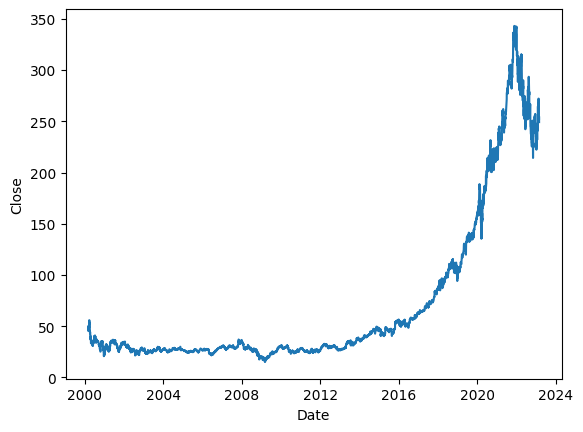

In [8]:
sns.lineplot(x="Date", y='Close', data=msft_df)

<Axes: xlabel='Date'>

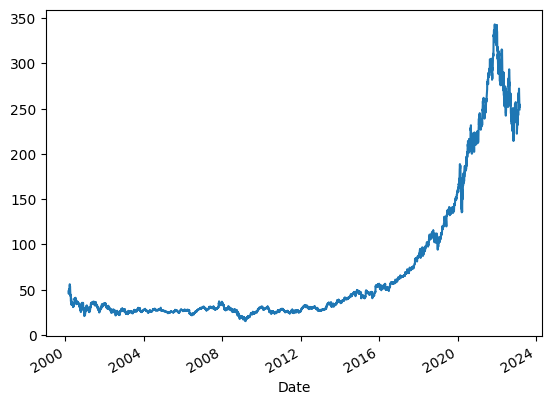

In [20]:
msft_df['Close'].plot()

In [3]:
# Definimos la fecha de inicio de los ultimo 23 años
start_date = datetime.now() - timedelta(days=23*365)
# Descargar los datos históricos de TESLA
tlsa_df = yf.download("TSLA", start=start_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
#Guardamos nuestro dataframe de Tesla
tlsa_df.to_csv('./tlsa.csv')

In [5]:
#Cargamos Nuestro dataframe de Tesla
tlsa_df = pd.read_csv('./tlsa.csv',index_col=0,parse_dates=True)

In [6]:
tlsa_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [15]:
tlsa_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3.187000e+03
mean,60.059588,61.424941,58.568007,60.028215,60.028215,9.477046e+07
std,95.821968,98.045078,93.332208,95.714792,95.714792,8.201267e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.323666,9.518000,9.039333,9.255000,9.255000,4.266825e+07
50%,16.364000,16.573334,16.105333,16.350668,16.350668,7.647750e+07
75%,27.176333,28.110001,26.556333,27.767667,27.767667,1.192372e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


<Axes: xlabel='Date'>

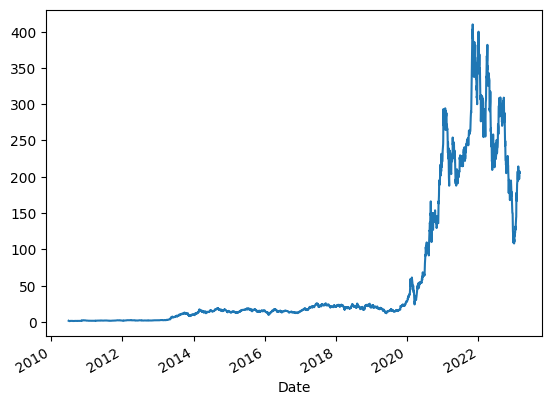

In [7]:
tlsa_df['Close'].plot()

In [16]:
tlsa_df.loc[tlsa_df.Close == tlsa_df.Close.min()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [29]:
# Definimos la fecha de inicio de los ultimo 23 años
start_date = datetime.now() - timedelta(days=23*365)
# Descargar los datos históricos de GOOGLE
goog_df = yf.download("GOOG", start=start_date)

[*********************100%***********************]  1 of 1 completed


In [30]:
#Guardamos nuestro dataframe de Google
goog_df.to_csv('./goog.csv')

In [31]:
goog_df=pd.read_csv('./goog.csv',index_col=0,parse_dates=True)

In [32]:
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


<Axes: xlabel='Date'>

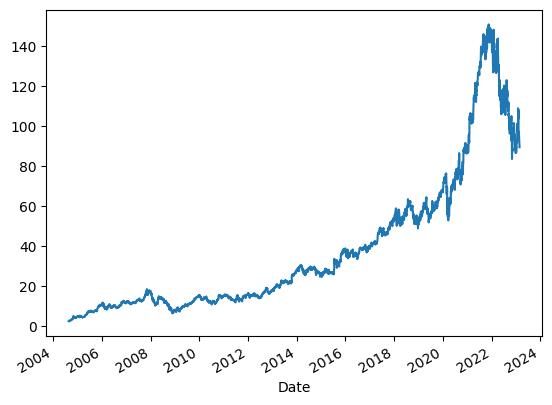

In [33]:
goog_df['Close'].plot()

In [34]:
goog_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4.662000e+03
mean,38.078492,38.474174,37.685770,38.086218,38.086218,1.228960e+08
std,35.460009,35.856818,35.080339,35.471011,35.471011,1.531007e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.640434,12.746411,12.466273,12.614032,12.614032,2.972750e+07
50%,25.440536,25.659696,25.129663,25.436408,25.436408,6.729530e+07
75%,54.288624,54.854250,53.672250,54.300501,54.300501,1.533015e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [36]:
# Definimos la fecha de inicio de los ultimo 23 años
start_date = datetime.now() - timedelta(days=23*365)
# Descargar los datos históricos de Amazon
amzn_df = yf.download('AMZN', start=start_date)

[*********************100%***********************]  1 of 1 completed


In [37]:
amzn_df.to_csv('./amzn.csv')

In [38]:
amzn_df=pd.read_csv('./amzn.csv',index_col=0,parse_dates=True)

In [39]:
amzn_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-03,3.16250,3.237500,3.103125,3.125000,3.125000,121190000
2000-03-06,3.14375,3.362500,3.140625,3.196875,3.196875,153316000
2000-03-07,3.24375,3.290625,3.106250,3.175000,3.175000,83576000
2000-03-08,3.16250,3.237500,3.028125,3.181250,3.181250,118814000
2000-03-09,3.15000,3.450000,3.109375,3.440625,3.440625,166250000


In [40]:
amzn_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000,5.782000e+03
mean,34.940708,35.354194,34.484797,34.927086,34.927086,1.233730e+08
std,49.658609,50.242550,49.003850,49.619844,49.619844,9.813005e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.195250,2.240500,2.165500,2.199250,2.199250,6.786950e+07
50%,9.531250,9.675000,9.373000,9.540500,9.540500,1.014300e+08
75%,47.794000,48.128125,47.447001,47.803750,47.803750,1.475985e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


<Axes: xlabel='Date'>

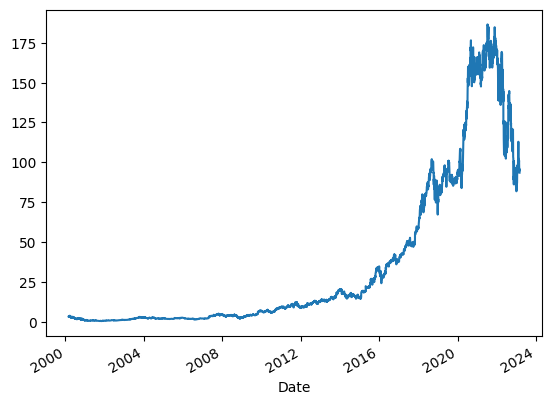

In [41]:
amzn_df['Close'].plot()